In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
# loading the train.csv file
train_data = pd.read_csv('GOOGL.csv')

In [3]:
# getting the first five values of the dataset
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
1,2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2,2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
3,2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
4,2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2335 non-null   object 
 1   Open       2335 non-null   float64
 2   High       2335 non-null   float64
 3   Low        2335 non-null   float64
 4   Close      2335 non-null   float64
 5   Adj Close  2335 non-null   float64
 6   Volume     2335 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 127.8+ KB


In [5]:
# adding new features to the dataset
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0 # high-low percentage
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0 # open-close percentage

In [6]:
train_data.shape

(2335, 9)

In [7]:
# checking for null values in the dataset
train_data.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
HL_PCT        0
PCT_change    0
dtype: int64

In [8]:
# picking the values we are working with
df = train_data[['Date', 'HL_PCT', 'PCT_change', 'Adj Close','Volume']]

In [9]:
# converting date to a datetime object
# setting the date as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

C:\Users\HP\.conda\envs\DataScience\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,HL_PCT,PCT_change,Adj Close,Volume
Date,,,,
2009-05-22,1.696426,-0.796656,196.946945,3433700
2009-05-26,3.846154,3.166221,202.382385,6202700
2009-05-27,1.741560,-0.019722,202.982986,6062500
2009-05-28,1.732536,0.420872,205.405411,5332200
2009-05-29,1.589967,1.242386,208.823822,5291100


# VISUALIZATION

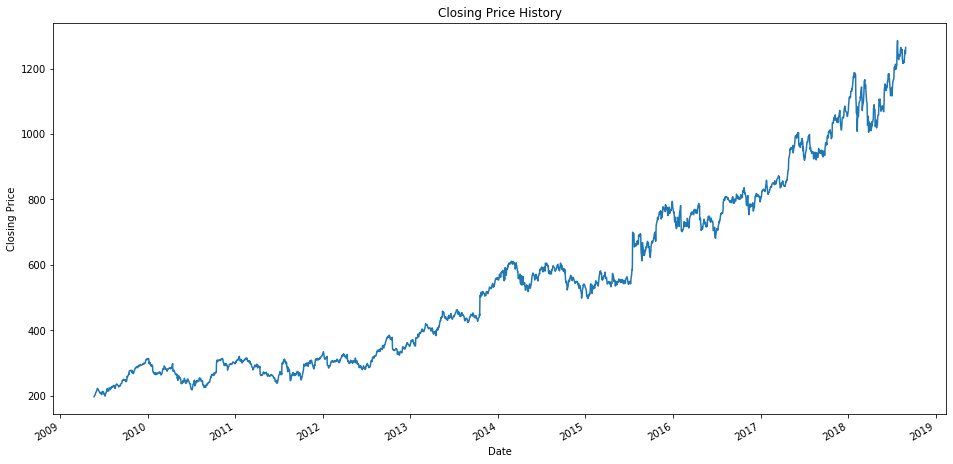

In [10]:
# visualizing the closing price
plt.figure(figsize=(16, 8)) # resizing the plot
df['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

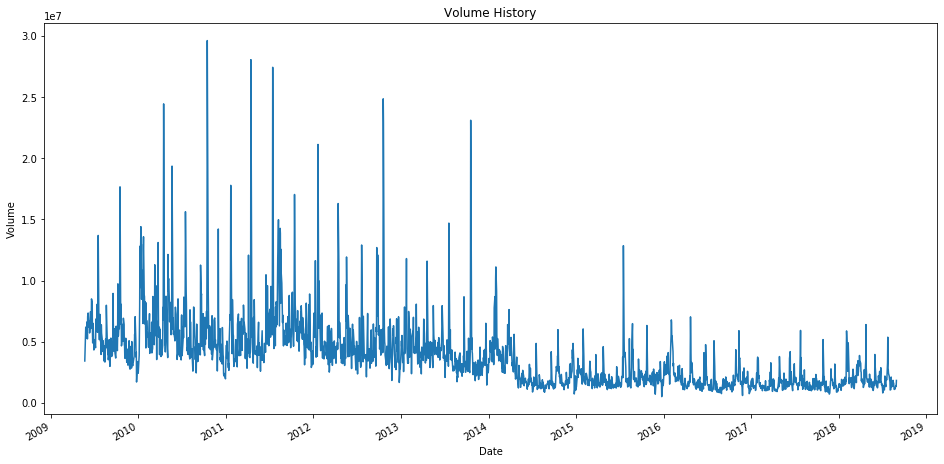

In [11]:
# visualizing the volume
plt.figure(figsize=(16, 8)) # resizing the plot
df['Volume'].plot()
plt.title('Volume History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Volume') # y label
plt.show()

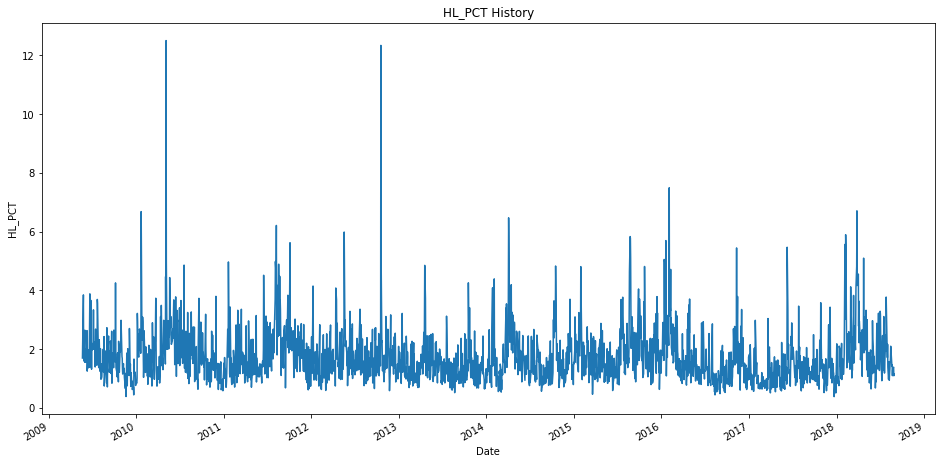

In [12]:
# visualizing the hl_pct
plt.figure(figsize=(16, 8)) # resizing the plot
df['HL_PCT'].plot()
plt.title('HL_PCT History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('HL_PCT') # y label
plt.show()

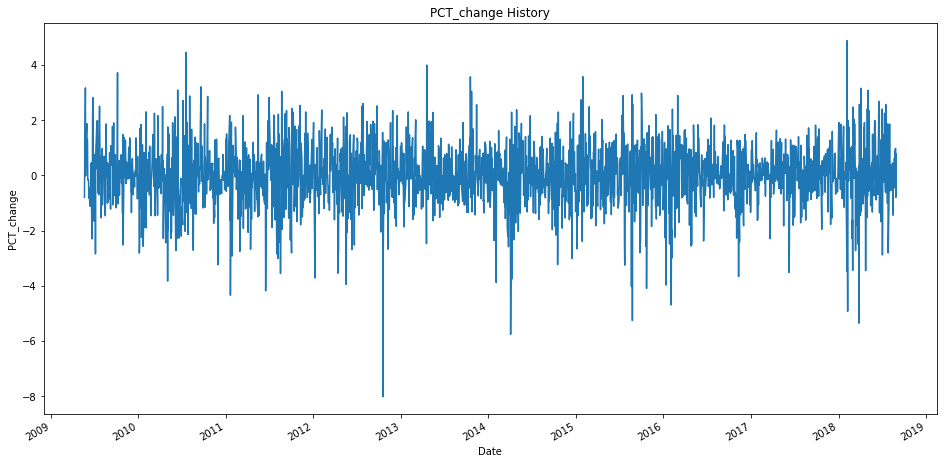

In [13]:
# visualizing the pct_change
plt.figure(figsize=(16, 8)) # resizing the plot
df['PCT_change'].plot()
plt.title('PCT_change History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('PCT_change') # y label
plt.show()

# Picking forecast data

In [14]:
# forcasting out 3% of the entire dataset
forecast_out = int(math.ceil(0.04 * len(df)))
df['label'] = df['Adj Close'].shift(-forecast_out)

C:\Users\HP\.conda\envs\DataScience\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# model building

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

In [16]:
scaler = StandardScaler()

In [17]:
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X) #scaling the data between 0s and 1s
X_lately = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

In [18]:
X.shape

(2241, 4)

In [19]:
df.dropna(inplace=True)

C:\Users\HP\.conda\envs\DataScience\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
y = np.array(df['label'])
y.shape

(2241,)

In [21]:
# splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LinearRegression()
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test) # getting the accuracy

In [22]:
confidence # accuracy of 95.8%

0.958309654969885

In [23]:
# calculating the rmsle score
y_pred = clf.predict(X_test)
mean_squared_log_error(y_test, y_pred)

0.01395967216389194

In [24]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day

In [25]:
forecast_set = clf.predict(X_lately) # predicting forecast data
df['Forecast'] = np.nan

C:\Users\HP\.conda\envs\DataScience\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Adding the predicted data to the dataset

In [26]:
import datetime
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

C:\Users\HP\.conda\envs\DataScience\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


# Visualizing Adj Close and the Forecast data

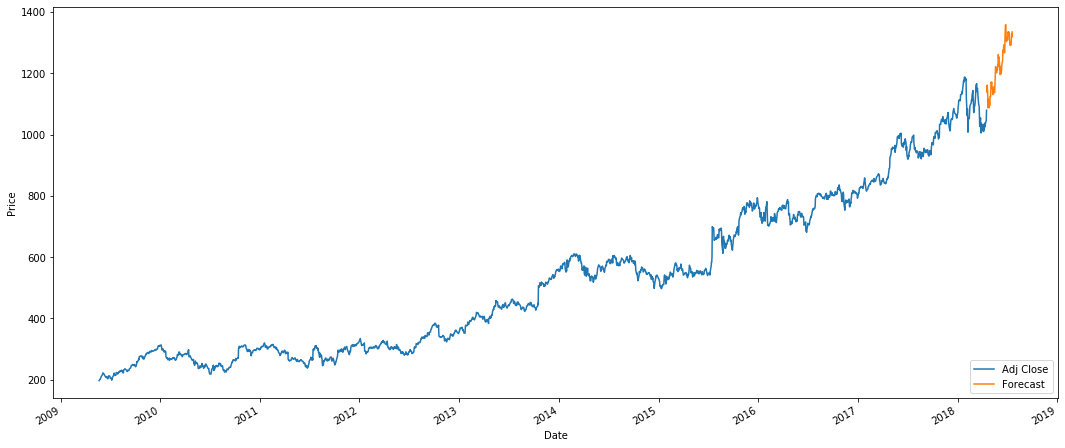

In [27]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()